<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/4.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_(Matplotlib_Seaborn_Pandas)_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика. Визуальный анализ данных (Matplotlib/Seaborn/Pandas). Часть 2


1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/3.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Matplotlib_Seaborn_Plotly.ipynb)
- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [6]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


<AxesSubplot:ylabel='Density'>

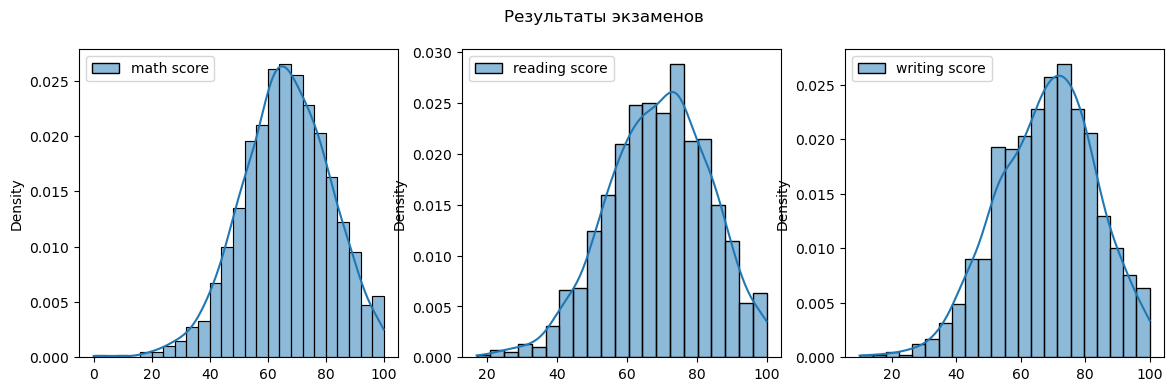

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
fig.suptitle("Результаты экзаменов")
sns.histplot(df[['math score']], kde=True, stat='density', ax=axes[0])
sns.histplot(df[['reading score']], kde=True, stat='density', ax=axes[1])
sns.histplot(df[['writing score']], kde=True, stat='density', ax=axes[2])

In [48]:
print(f"Math score median: {df[['math score']].median()[0]}")
print(f"Reading score median: {df[['reading score']].median()[0]}")
print(f"Writing score median: {df[['writing score']].median()[0]}")

Math score median: 66.0
Reading score median: 70.0
Writing score median: 69.0


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

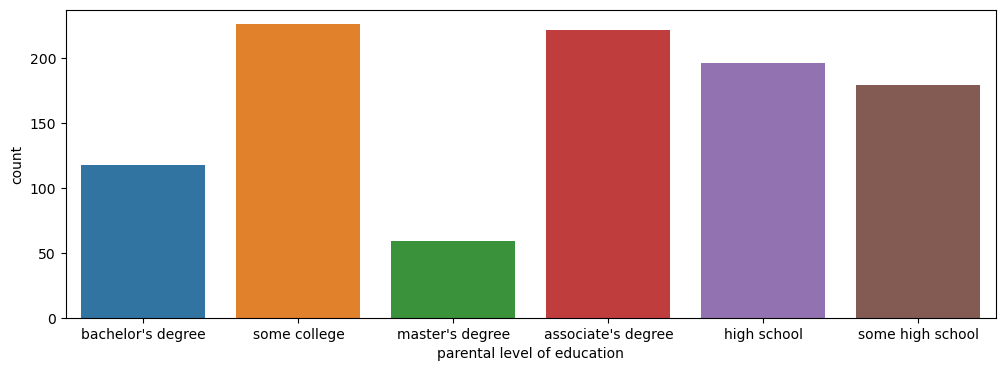

In [61]:
plt.figure(figsize=(12,4))
sns.countplot(x='parental level of education', data=df)
df['parental level of education'].value_counts()

<AxesSubplot:xlabel='parental level of education'>

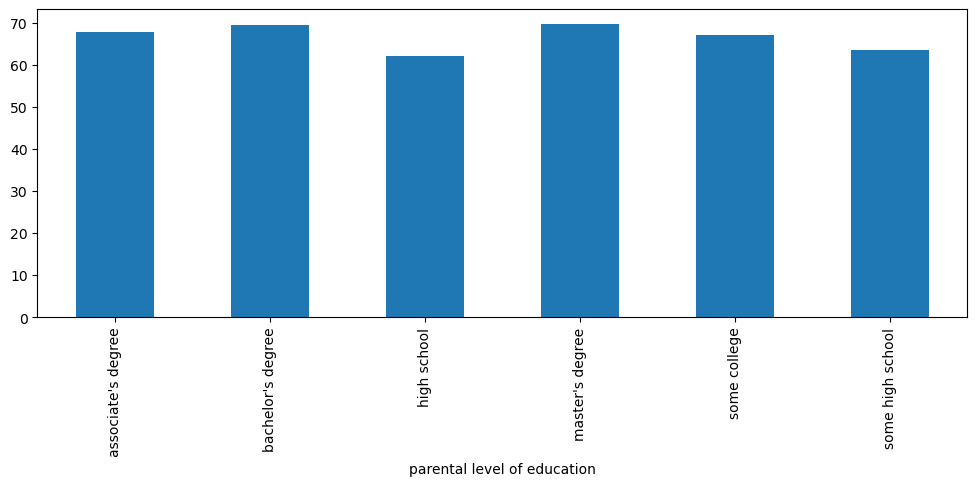

In [71]:
plt.figure(figsize=(12,4))
df.groupby('parental level of education').mean()['math score'].plot(kind='bar')

Как видно из графика различия есть, и по мере повышения степени образования родителей, повышается и средний балл по математике

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [72]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [76]:
df[(df['gender']=='female') & (df['math score']>90) & (df['reading score']>90) & (df['writing score']>90)].count()[0]

17

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [88]:
df[['gender', 'math score','reading score', 'writing score']].groupby('gender').agg(['min', 'mean', 'max'])

math score                 reading score                 writing score  \
              min       mean  max           min       mean  max           min   
gender                                                                          
female          0  63.633205  100            17  72.608108  100            10   
male           27  68.728216  100            23  65.473029  100            15   

                        
             mean  max  
gender                  
female  72.467181  100  
male    63.311203  100

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [91]:
df[['lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
   ].groupby(['lunch', 'test preparation course']).agg('mean')

math score  reading score  writing score
lunch        test preparation course                                          
free/reduced completed                 63.045802      69.870229      70.351145
             none                      56.508929      61.602679      58.736607
standard     completed                 73.533040      76.215859      76.766520
             none                      68.133971      69.177033      67.595694

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

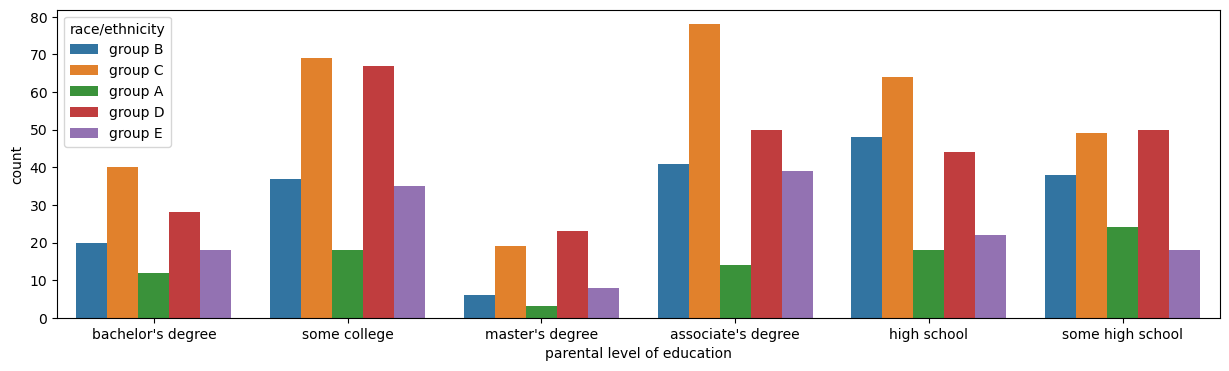

In [134]:
plt.figure(figsize=(15,4))
sns.countplot(x='parental level of education', hue='race/ethnicity', data=df)


#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

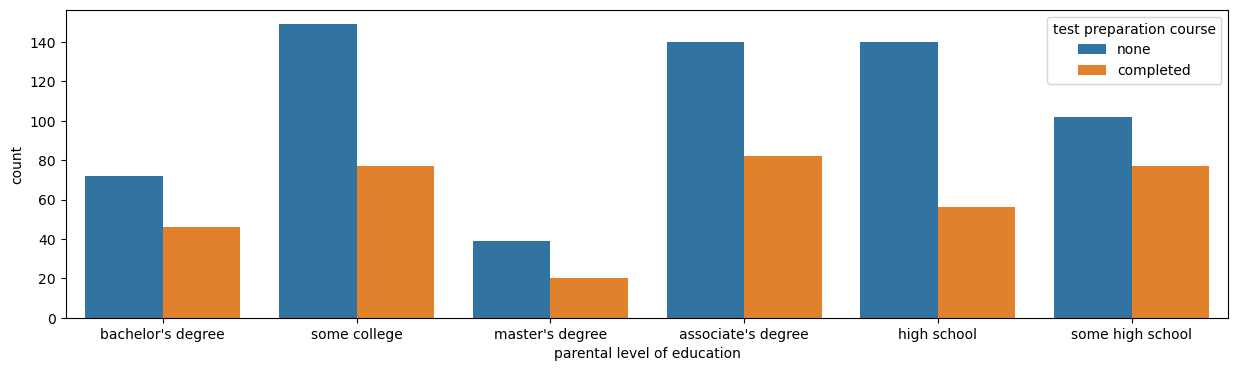

In [147]:
plt.figure(figsize=(15,4))
sns.countplot(x='parental level of education', hue='test preparation course', data=df)

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

<AxesSubplot:ylabel='math passed'>

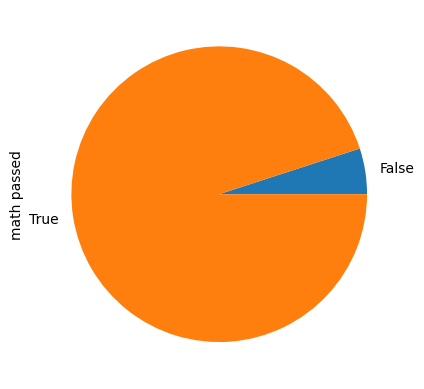

In [155]:
df['math_passed'] = False
df.loc[df['math score'] > 40, 'math_passed'] = True
df.groupby('math_passed').count()['gender'].rename('math passed').plot(kind='pie')

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

In [157]:
df['grade'] = 'grade E'
df.loc[(((df['math score']+df['reading score']+df['writing score'])/3) > 40) &
       (((df['math score']+df['reading score']+df['writing score'])/3) <= 60)
       & (df["math_passed"] == True), 'grade'] = 'grade D'
df.loc[(((df['math score']+df['reading score']+df['writing score'])/3) > 60) &
       (((df['math score']+df['reading score']+df['writing score'])/3) <= 70)
       & (df["math_passed"] == True), 'grade'] = 'grade C'
df.loc[(((df['math score']+df['reading score']+df['writing score'])/3) > 70) &
       (((df['math score']+df['reading score']+df['writing score'])/3) <= 80)
       & (df["math_passed"] == True), 'grade'] = 'grade B'
df.loc[(((df['math score']+df['reading score']+df['writing score'])/3) > 80) &
       (((df['math score']+df['reading score']+df['writing score'])/3) <= 90)
       & (df["math_passed"] == True), 'grade'] = 'grade A'
df.loc[(((df['math score']+df['reading score']+df['writing score'])/3) > 90) &
       (((df['math score']+df['reading score']+df['writing score'])/3) <= 10)
       & (df["math_passed"] == True), 'grade'] = 'grade O'

In [ ]:
df.tail()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В